<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/P_de_Corridas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRUEMBA DE CORRIDAS**
En la prueba de corridas arriba y abajo, una secuencia de números pseudoaleatorios $U_1 \ldots U_n$ es generada, y al igual que en et inciso anterior, una secuencia binaria es obtenida, en la cual el $i^{\text {ih }}$ término es cero si $U_i<U_{i+1}$ y 1 si $U_i>U_{i+1}$. Una vez obtenida la secuencia binaria, se sigue el mismo procedimiento descrito anteriormente y se obtiene la frecuencia observada para cada tamaño de corrida. EY número total esperado de corridas y el número esperado para cada tamaño de corrida, se obtienen con las siguientes expresiones:
$$
E \text { (total de corridas) }=\frac{2 N-1}{3}
$$
$$
\begin{gathered}
F E_i=2\left(\frac{\left(i^2+3 i+1\right) N-\left(i^3+3 i^2-i-4\right)}{(i+3)!}\right) \text { para } i<N-1 \text {} \\
F E_{N-1}=\frac{2}{N!} \text { para } i=N-1
\end{gathered}
$$

Finalmente, el estadistico $X_0$ se determina de acuerdo a la siguiente expresión:
$$
X_0^2=\sum_{i=1}^n \frac{\left(F O_i-F E_i\right)^2}{F E_i}
$$
donde $n$ es el número de términos de la ecuación (3.19). Es importante señalar que en el cálculo del estadistico $X_0^2$, la frecuencia esperada para cada tamaño de corrida debe ser mayor o igual a cinco. Si las frecuencias esperadas para corridas de tamaño grande son menores que 5, tales frecuencias se deben de agrupar con las adyacentes de tal modo que la frecuencia esperada de los tamaños de corrida sea de al menos 5 .

# EJERCICIO 1

Realice una prueba de corridas con un nivel de aceptación del 95 %

0.048 0.591 0.478 0.166 0.932
0.926 0.007 0.551 0.362 0.533
0.368 0.437 0.178 0.411 0.545
0.787 0.594 0.086 0.951 0.772
0.298 0.199 0.157 0.401 0.631

In [ ]:
#data =[0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55, 0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80, 0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45, 0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60, 0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08, 0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43, 0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12, 0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87, 0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64, 0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]
data = [0.048, 0.591, 0.478, 0.166, 0.932, 0.926, 0.007, 0.551, 0.362, 0.533, 0.368, 0.437, 0.178, 0.411, 0.545, 0.787, 0.594, 0.086, 0.951, 0.772, 0.298, 0.199, 0.157, 0.401, 0.631]
i=0
a = 0.05
signo = [] #Lista que guarda los 0 y 1 dependiendo del criterio establecido
import math

for i in range(len(data) - 1):
   if data[i] >= data[i+1]: #Compara el elemento anterior de la lista con el elemento siguiente y asigna 0's y 1's
       signo.insert(i,0)
   else:
    signo.insert(i,1)

#Calculamos el numero de corridas en la lista
co = 1
for i in range(len(signo) - 1):
    if signo[i] != signo[i+1]:
      co = co +1


#Calculamos el valor esperado y la varinza
n = len(data)
mu = (2*n-1)/3
var = math.sqrt((16*n-24)/90)

#Calculamos el estadístico de prueba

Z0 = (co-mu)/var
#Calcular el punto critico
import scipy.stats as stats #Nos permite acceder a las funciones y distribuciones estadísticas que proporciona SciPy

alpha = a/2
# Calcula el valor de Z correspondiente a alpha
z_a = stats.norm.ppf(alpha)
#Toma de decisión

#Ajustamos para colocar correctamente el intervalo de aceptación
if z_a<0:
  z_a = -z_a
#Imprimimos los datos
signo.insert(0,"-")

A = [[data[i],signo[i]] for i in range(len(data))]
head = ["xi","S"]
A.insert(0,head) # inserta una fila al principio de la matriz A
from tabulate import tabulate
# Imprimir los datos en formato de tabla
print(tabulate(A, headers="firstrow", tablefmt="fancy_grid"))


print("-"*11, "D A T O S", "-"*11)
print(" ---> co = ", round(co,3)) #la función round nos permite indicar el numero de decimales que queremos
print(" ---> mu = ", round(mu,3))
print(" ---> var = ", round(var,3))
print(" ---> Zo = ", round(Z0,3))
print(" ---> Z_a/2 = ", round(z_a,3))
print("-"*33)
#INTERVALO DE ACEPTACION
if -z_a <= Z0 <= z_a:
  print("* INTERVALO DE ACEPTACION: ", round(-z_a,3), "<=", round(Z0,3), "<=",round(z_a,3) )
  print("CONCLUSION: Se acepta la hipótesis nula, es decir los numeros estan distribuidos aleatoriamente, esto con una com¿nfiabilidad del ", (1-a)*100, "%")
else:
  print("* Z_0 = ", round(Z0,3), "no esta en el intervalo de aceptacion, es decir, esta fuera del intervalo [", round(-z_a,3),",",round(z_a,3),"]")
  print("CONCLUSION: Se rechaza la hipótesis nula, es decir los numeros no estan distribuidos aleatoriamente, esto con una com¿nfiabilidad del ", (1-a)*100, "%")


╒═══════╤═════╕
│    xi │ S   │
╞═══════╪═════╡
│ 0.048 │ -   │
├───────┼─────┤
│ 0.591 │ 1   │
├───────┼─────┤
│ 0.478 │ 0   │
├───────┼─────┤
│ 0.166 │ 0   │
├───────┼─────┤
│ 0.932 │ 1   │
├───────┼─────┤
│ 0.926 │ 0   │
├───────┼─────┤
│ 0.007 │ 0   │
├───────┼─────┤
│ 0.551 │ 1   │
├───────┼─────┤
│ 0.362 │ 0   │
├───────┼─────┤
│ 0.533 │ 1   │
├───────┼─────┤
│ 0.368 │ 0   │
├───────┼─────┤
│ 0.437 │ 1   │
├───────┼─────┤
│ 0.178 │ 0   │
├───────┼─────┤
│ 0.411 │ 1   │
├───────┼─────┤
│ 0.545 │ 1   │
├───────┼─────┤
│ 0.787 │ 1   │
├───────┼─────┤
│ 0.594 │ 0   │
├───────┼─────┤
│ 0.086 │ 0   │
├───────┼─────┤
│ 0.951 │ 1   │
├───────┼─────┤
│ 0.772 │ 0   │
├───────┼─────┤
│ 0.298 │ 0   │
├───────┼─────┤
│ 0.199 │ 0   │
├───────┼─────┤
│ 0.157 │ 0   │
├───────┼─────┤
│ 0.401 │ 1   │
├───────┼─────┤
│ 0.631 │ 1   │
╘═══════╧═════╛
----------- D A T O S -----------
 ---> co =  15
 ---> mu =  16.333
 ---> var =  2.044
 ---> Zo =  -0.652
 ---> Z_a/2 =  1.96
--------------------------

# EJERCICIO 2

Realice las tres pruebas estudiadas hasta ahora a esta muestra, con un nivel de aceptación de 95 %.

0.78 0.98 0.24 0.73 0.43 0.16 0.78 0.47 0.18 0.55
0.04 0.29 0.68 0.77 0.16 0.03 0.79 0.22 0.37 0.80
0.96 0.26 0.91 0.55 0.75 0.55 0.64 0.39 0.53 0.45
0.61 0.14 0.38 0.12 0.40 0.74 0.78 0.98 0.27 0.60
0.43 0.67 0.62 0.32 0.53 0.54 0.24 0.29 0.18 0.08
0.82 0.94 0.19 0.98 0.41 1.00 0.74 0.92 0.14 0.43
0.83 0.88 0.18 0.21 0.50 0.13 0.43 0.69 0.08 0.12
0.22 0.50 0.16 0.11 0.18 0.89 0.80 0.42 0.29 0.87
0.83 0.79 0.65 0.28 0.78 0.49 0.36 0.86 0.87 0.64
0.51 0.07 0.18 0.94 0.50 0.22 0.66 0.91 0.48 0.24

***PRUEBA DE CORRIDAS***

In [ ]:
data =[0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55, 0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80, 0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45, 0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60, 0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08, 0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43, 0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12, 0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87, 0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64, 0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]
#data = [0.048, 0.591, 0.478, 0.166, 0.932, 0.926, 0.007, 0.551, 0.362, 0.533, 0.368, 0.437, 0.178, 0.411, 0.545, 0.787, 0.594, 0.086, 0.951, 0.772, 0.298, 0.199, 0.157, 0.401, 0.631]
i=0
a = 0.05
signo = [] #Lista que guarda los 0 y 1 dependiendo del criterio establecido
import math

for i in range(len(data) - 1):
   if data[i] >= data[i+1]: #Compara el elemento anterior de la lista con el elemento siguiente y asigna 0's y 1's
       signo.insert(i,0)
   else:
    signo.insert(i,1)

#Calculamos el numero de corridas en la lista
co = 1
for i in range(len(signo) - 1):
    if signo[i] != signo[i+1]:
      co = co +1


#Calculamos el valor esperado y la varinza
n = len(data)
mu = (2*n-1)/3
var = math.sqrt((16*n-24)/90)

#Calculamos el estadístico de prueba

Z0 = (co-mu)/var
#Calcular el punto critico
import scipy.stats as stats #Nos permite acceder a las funciones y distribuciones estadísticas que proporciona SciPy

alpha = a/2
# Calcula el valor de Z correspondiente a alpha
z_a = stats.norm.ppf(alpha)
#Toma de decisión

#Ajustamos para colocar correctamente el intervalo de aceptación
if z_a<0:
  z_a = -z_a
#Imprimimos los datos
signo.insert(0,"-")

A = [[data[i],signo[i]] for i in range(len(data))]
head = ["xi","S"]
A.insert(0,head) # inserta una fila al principio de la matriz A
from tabulate import tabulate
# Imprimir los datos en formato de tabla
print(tabulate(A, headers="firstrow", tablefmt="fancy_grid"))


print("-"*11, "D A T O S", "-"*11)
print(" ---> co = ", round(co,3)) #la función round nos permite indicar el numero de decimales que queremos
print(" ---> mu = ", round(mu,3))
print(" ---> var = ", round(var,3))
print(" ---> Zo = ", round(Z0,3))
print(" ---> Z_a/2 = ", round(z_a,3))
print("-"*33)
#INTERVALO DE ACEPTACION
if -z_a <= Z0 <= z_a:
  print("* INTERVALO DE ACEPTACION: ", round(-z_a,3), "<=", round(Z0,3), "<=",round(z_a,3) )
  print("CONCLUSION: Se acepta la hipótesis nula, es decir los numeros estan distribuidos aleatoriamente, esto con una confiabilidad del ", (1-a)*100, "%")
else:
  print("* Z_0 = ", round(Z0,3), "no esta en el intervalo de aceptacion, es decir, esta fuera del intervalo [", round(-z_a,3),",",round(z_a,3),"]")
  print("CONCLUSION: Se rechaza la hipótesis nula, es decir los numeros no estan distribuidos aleatoriamente, esto con una confiabilidad del ", (1-a)*100, "%")


╒══════╤═════╕
│   xi │ S   │
╞══════╪═════╡
│ 0.78 │ -   │
├──────┼─────┤
│ 0.98 │ 1   │
├──────┼─────┤
│ 0.24 │ 0   │
├──────┼─────┤
│ 0.73 │ 1   │
├──────┼─────┤
│ 0.43 │ 0   │
├──────┼─────┤
│ 0.16 │ 0   │
├──────┼─────┤
│ 0.78 │ 1   │
├──────┼─────┤
│ 0.47 │ 0   │
├──────┼─────┤
│ 0.18 │ 0   │
├──────┼─────┤
│ 0.55 │ 1   │
├──────┼─────┤
│ 0.04 │ 0   │
├──────┼─────┤
│ 0.29 │ 1   │
├──────┼─────┤
│ 0.68 │ 1   │
├──────┼─────┤
│ 0.77 │ 1   │
├──────┼─────┤
│ 0.16 │ 0   │
├──────┼─────┤
│ 0.03 │ 0   │
├──────┼─────┤
│ 0.79 │ 1   │
├──────┼─────┤
│ 0.22 │ 0   │
├──────┼─────┤
│ 0.37 │ 1   │
├──────┼─────┤
│ 0.8  │ 1   │
├──────┼─────┤
│ 0.96 │ 1   │
├──────┼─────┤
│ 0.26 │ 0   │
├──────┼─────┤
│ 0.91 │ 1   │
├──────┼─────┤
│ 0.55 │ 0   │
├──────┼─────┤
│ 0.75 │ 1   │
├──────┼─────┤
│ 0.55 │ 0   │
├──────┼─────┤
│ 0.64 │ 1   │
├──────┼─────┤
│ 0.39 │ 0   │
├──────┼─────┤
│ 0.53 │ 1   │
├──────┼─────┤
│ 0.45 │ 0   │
├──────┼─────┤
│ 0.61 │ 1   │
├──────┼─────┤
│ 0.14 │ 0   │
├──────┼──

***PRUEBA CHI***

╒═════════════╤══════╤══════╤═════════╤═════════════╤════════════════╕
│ Clases      │   fo │   fe │   fo-fe │   (fo-fe)^2 │   (fo-fe)^2/fe │
╞═════════════╪══════╪══════╪═════════╪═════════════╪════════════════╡
│ (0.01-0.20) │   20 │   20 │       0 │           0 │           0    │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.21-0.40) │   19 │   20 │      -1 │           1 │           0.05 │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.41-0.60) │   21 │   20 │       1 │           1 │           0.05 │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.61-0.80) │   22 │   20 │       2 │           4 │           0.2  │
├─────────────┼──────┼──────┼─────────┼─────────────┼────────────────┤
│ (0.81-1.00) │   18 │   20 │      -2 │           4 │           0.2  │
╘═════════════╧══════╧══════╧═════════╧═════════════╧════════════════╛


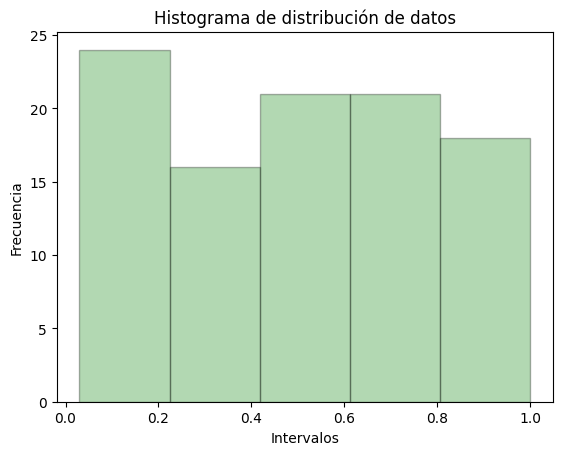

Estadístico de prueba:  0.5
Valor crítico: 9.5
******************************************************************************************
* Aceptamos la hipotesis nula (Ho) dado que 0.5 <= 9.5 *
* Los datos pueden seguir una distribución uniforme *
Conclusión: No existe diferencia entre las proporciones de cada intervalo establecido.
******************************************************************************************


In [ ]:
datos = [0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55, 0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80, 0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45, 0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60, 0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08, 0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43, 0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12, 0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87, 0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64, 0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]

clases = 5
f1 = 0
f2 = 0
f3 = 0
f4 = 0
f5 = 0
i = 0


for i in range(100):
    if 0 <= datos[i] <= 0.20:
        f1 = f1+ 1
    elif 0.21 <= datos[i] <= 0.40:
        f2 = f2 + 1
    elif 0.41 <= datos[i] <= 0.60:
        f3 = f3 + 1
    elif 0.61 <= datos[i] <= 0.80:
        f4 = f4 + 1
    elif 0.81 <= datos[i] <= 1:
        f5 = f5 + 1

#Calvualmos la frecuencia esperada fe
frec = [f1,f2,f3,f4,f5]
fe = len(datos)/clases
fes = [20,20, 20, 20, 20]
fofe = []
fofe_2 = []
fofe_2_fe = []
for i in range(5):
  fofe.insert(i,frec[i]-fe)
  fofe_2.insert(i,fofe[i]**2)
  fofe_2_fe.insert(i,fofe_2[i]/fe)

inter = ["(0.01-0.20)", "(0.21-0.40)", "(0.41-0.60)","(0.61-0.80)", "(0.81-1.00)"]

A = [[inter[i],frec[i],fes[i], fofe[i],fofe_2[i], fofe_2_fe[i]] for i in range(5)]
head = ["Clases","fo","fe","fo-fe", "(fo-fe)^2", "(fo-fe)^2/fe"]
A.insert(0,head)

from tabulate import tabulate
# Imprimir los datos en formato de tabla
print(tabulate(A, headers="firstrow", tablefmt="fancy_grid"))

#Imprimir un histograma
import matplotlib.pyplot as plt
# Histograma
plt.hist(datos, bins=clases, color='green', edgecolor='black', alpha=0.3)
plt.title('Histograma de distribución de datos')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.show()

# Sumar los elementos
est=sum(fofe_2_fe[i] for i in range(5)) # sumar los elemento de la lista
print("Estadístico de prueba: ", est)

from scipy.stats import chi2

# Grados de libertad
grados_libertad = clases - 1

# Nivel de confianza (90% / 100= 0.90)
nivel_confianza = 0.95

# Calcular el valor crítico de chi-cuadrada para el nivel de confianza dado
valc = chi2.ppf(nivel_confianza, grados_libertad)
valor_critico = round(valc, 1)
print("Valor crítico:", valor_critico)


if est <= valor_critico:
  text1="Aceptamos la hipotesis nula (Ho) dado que {} <= {}".format(est,valor_critico)
  text2="Los datos pueden seguir una distribución uniforme"
  text3="Conclusión: No existe diferencia entre las proporciones de cada intervalo establecido."
  longitud_cuadro = max(len(text1), len(text2),len(text3)) + 4
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print(f"{text3}")
  print("*" * longitud_cuadro)
elif est > valor_critico:
  text1="Rechazamos la hipotesis nula (Ho) dado que {} > {}".format(est,valor_critico)
  text2="Los datos no siguen una distribución uniforme"
  text3="Conclusión: Existe diferencia entre las proporciones de los datos."
  longitud_cuadro = max(len(text1), len(text2),len(text3))
  print("*" * longitud_cuadro)
  print(f"* {text1} *")
  print(f"* {text2} *")
  print(f" {text3} ")
  print("*" * longitud_cuadro)

***PRUEBA K-S***

In [ ]:
import math #Nos permite usar la función sqrt
#datos = [0.8797, 0.3884, 0.6289, 0.8750, 0.5999, 0.8589, 0.9996, 0.2415, 0.3808, 0.9606,0.9848, 0.3469, 0.7977, 0.5844, 0.8147, 0.6431, 0.7387, 0.5613, 0.0318, 0.7401,0.4557, 0.1592, 0.8536, 0.8846, 0.3410, 0.1492, 0.8681, 0.5291, 0.3188, 0.5992,0.9170, 0.2204, 0.5991, 0.5461, 0.5739, 0.3254, 0.0856, 0.2258, 0.4603, 0.5027,0.8376, 0.6235, 0.3681, 0.2088, 0.1525, 0.2006, 0.4720, 0.4272, 0.6360, 0.0954]
datos = [0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55, 0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80, 0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45, 0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60, 0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08, 0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43, 0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12, 0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87, 0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64, 0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]

#1. Ordenar de menor a mayor
datos.sort()
n = len(datos)
alpha = 0.05
D1=[]
D2 =[]
i = 0
j = 1

for i in range(n):
  D1.insert(i,abs(j/n-datos[i])) # D+
  D2.insert(i,abs(datos[i]-(j-1)/n)) #D-
  j = j+1

#D+, D-
max_d1 = round(max(D1),4)
max_d2 = round(max(D2),4)
#D
D = max(max_d1, max_d2)

kolmogorov = [
    [0.3027, 0.3216, 0.3456, 0.3754, 0.4129],
    [0.2893, 0.3027, 0.3188, 0.3427, 0.3959],
    [0.2694, 0.2816, 0.2982, 0.3245, 0.3728],
    [0.2521, 0.2641, 0.2802, 0.3041, 0.3504],
    [0.2387, 0.2502, 0.2649, 0.2875, 0.3331],
    [0.2273, 0.2382, 0.2522, 0.2744, 0.3162],
    [0.2171, 0.2273, 0.241, 0.2616, 0.3037],
    [0.208, 0.2179, 0.2306, 0.2506, 0.2905],
    [0.2004, 0.2101, 0.2228, 0.2426, 0.2812],
    [0.1932, 0.2025, 0.2147, 0.2337, 0.2714],
    [0.1869, 0.1959, 0.2077, 0.2257, 0.2627],
    [0.1811, 0.1899, 0.2016, 0.2196, 0.2545],
    [0.1758, 0.1843, 0.1956, 0.2128, 0.2477],
    [0.1711, 0.1794, 0.1902, 0.2071, 0.2408],
    [0.1666, 0.1747, 0.1852, 0.2018, 0.2345],
    [0.1624, 0.17, 0.1803, 0.1965, 0.2285],
    [0.1589, 0.1666, 0.1764, 0.192, 0.2226],
    [0.1429, 0.1498, 0.1589, 0.1726, 0.201],
    [0.1315, 0.1378, 0.146, 0.159, 0.1848],
    [0.1291, 0.1353, 0.1432, 0.1559, 0.182],
    [0.1274, 0.1336, 0.1415, 0.1542, 0.1798],
    [0.1254, 0.1314, 0.1392, 0.1518, 0.177],
    [0.1236, 0.1295, 0.1373, 0.1497, 0.1747],
    [0.122, 0.1278, 0.1356, 0.1478, 0.172],
    [0.1203, 0.126, 0.1336, 0.1454, 0.1695],
    [0.1188, 0.1245, 0.132, 0.1436, 0.1677],
    [0.1174, 0.123, 0.1303, 0.1421, 0.1653],
    [0.1159, 0.1214, 0.1288, 0.1402, 0.1634],
    [0.1147, 0.1204, 0.1275, 0.1386, 0.1616],
    [0.1131, 0.1186, 0.1258, 0.1373, 0.1599],
    [0.1119, 0.1172, 0.1244, 0.1353, 0.1573],
    [0.1106, 0.1159, 0.1228, 0.1339, 0.1556],
    [0.1095, 0.1148, 0.1216, 0.1322, 0.1542],
    [0.1083, 0.1134, 0.1204, 0.1309, 0.1525],
    [0.1071, 0.1123, 0.1189, 0.1293, 0.1512],
    [0.1062, 0.1113, 0.118, 0.1282, 0.1499],
    [0.1047, 0.1098, 0.1165, 0.1269, 0.1476],
    [0.104, 0.1089, 0.1153, 0.1256, 0.1463],
    [0.103, 0.1079, 0.1142, 0.1246, 0.1457]
]

significancia = [0.20, 0.25,0.10,0.05,0.01]
tamaño1 = list(range(4,21)) #[4,5,...,21]
a = [25]
tamaño1.extend(a)
tamaño2 = list(range(30,51))
tamaño = tamaño1 + tamaño2 #[4,5,...,21,25,30,31,....50]


if n<=50:
  i = 0
  for i in range(len(significancia)):
    if significancia[i] == alpha:
       col = i
  i = 0
  for i in range(len(tamaño)):
    if tamaño[i] == n:
      fil = i
  d_alpha = kolmogorov[fil][col] #Entra en la matriz creada con los datos de la distribucion de Kolmogorov y nos devuelve el valor segun su significancia
else:
  a = 0.724165/math.sqrt(n)
  b = 0.758905/math.sqrt(n)
  c = 0.8043545/math.sqrt(n)
  d = 0.875897/math.sqrt(n)
  e = 1.0210785/math.sqrt(n)
  add = [a,b,c,d,e] #Creamos un arreglo donde contenga las formulas para cuando n>50
  for i in range(len(significancia)):
    if significancia[i] == alpha:
       col = i
       d_alpha = add[i]
       print(i)


print("-"*11, "D A T O S", "-"*11)
print(" ---> D+ = ", max_d1)
print(" ---> D- = ", max_d2)
print(" ---> D = max{D+,D-} = ", D)
print(" ---> d_alpha = ", d_alpha)
print("-"*33)

#Aplicamos el criterio de kolmogorov
print("*" * 60, "C O N C L U S I O N ", "*"*60)
if D < d_alpha:
  text1="Dado que {} < {} se acepta la hipótesis nula, es decir, los datos siguen una distribución uniforme, esto con una confiabilidad del 95%".format(D, d_alpha)
  print(f"{text1}")
else:
  text2="Dado que {} > {} se rechaza la hipótesis nula, es decir, los datos no siguen una distribución uniforme, esto con una confiabilidad del 95%".format(D, d_alpha)
  print(f"{text2}")
print("*" * len(text1))

print("-"*11, "T A B L A", "-"*11)

A = [[i+1,datos[i],D2[i],D1[i]] for i in range(n)]
head = ["i", "Xi", "D-","D+"]
A.insert(0,head)

from tabulate import tabulate
# Imprimir los datos en formato de tabla
print(tabulate(A, headers="firstrow", tablefmt="fancy_grid"))

3
----------- D A T O S -----------
 ---> D+ =  0.05
 ---> D- =  0.06
 ---> D = max{D+,D-} =  0.06
 ---> d_alpha =  0.0875897
---------------------------------
************************************************************ C O N C L U S I O N  ************************************************************
Dado que 0.06 < 0.0875897 se acepta la hipótesis nula, es decir, los datos siguen una distribución uniforme, esto con una confiabilidad del 95%
***********************************************************************************************************************************************
----------- T A B L A -----------
╒═════╤══════╤══════╤══════╕
│   i │   Xi │   D- │   D+ │
╞═════╪══════╪══════╪══════╡
│   1 │ 0.03 │ 0.03 │ 0.02 │
├─────┼──────┼──────┼──────┤
│   2 │ 0.04 │ 0.03 │ 0.02 │
├─────┼──────┼──────┼──────┤
│   3 │ 0.07 │ 0.05 │ 0.04 │
├─────┼──────┼──────┼──────┤
│   4 │ 0.08 │ 0.05 │ 0.04 │
├─────┼──────┼──────┼──────┤
│   5 │ 0.08 │ 0.04 │ 0.03 │
├─────┼──────┼──────┼──────